In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#EDA

In [3]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 5)


dictionary = pd.read_csv('goodreads_data_dictionary.csv')
reviews = pd.read_csv('goodreads_reviews.csv', nrows=10000)  
works=pd.read_csv('goodreads_works.csv', nrows=10000)


Works Shape: (10000, 20)
    work_id        isbn        isbn13         original_title  \
0   2919130  1416534601  9.781417e+12              Nocturnes   
1  52087333         NaN           NaN              Draw Play   
2   1649583  1416505520  9.781417e+12  Citizen of the Galaxy   
3    688299  0060541830  9.780061e+12                  Congo   
4   3464264  0451528824  9.780452e+12   Anne of Green Gables   

               author  original_publication_year  num_pages  \
0       John Connolly                     2004.0        NaN   
1           Tia Lewis                     2016.0        NaN   
2  Robert A. Heinlein                     1957.0        NaN   
3    Michael Crichton                     1980.0        NaN   
4     L.M. Montgomery                     1908.0        NaN   

                                         description  \
0                                                NaN   
1  Jake:\nI can't believe my coach assigned me a ...   
2  In a distant galaxy, the atrocity of sla

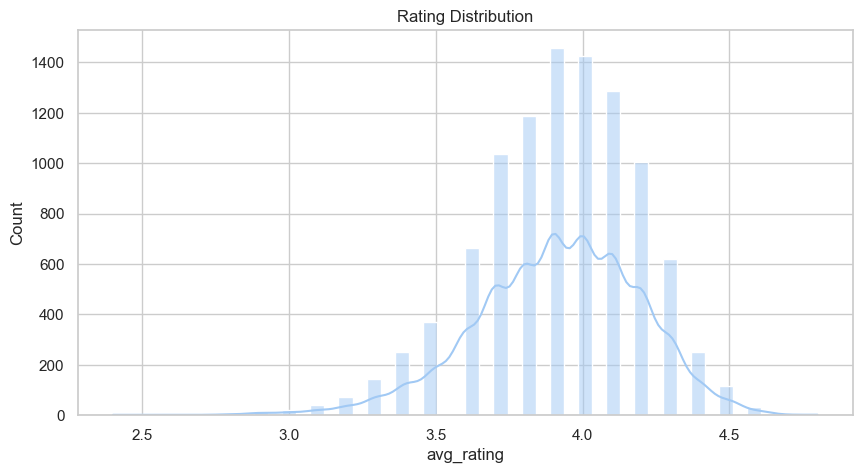

In [4]:

print("Works Shape:", works.shape)
print(works.head())
print(works.info())


print(works.isnull().sum())


sns.histplot(works['avg_rating'], bins=50, kde=True)
plt.title("Rating Distribution")
plt.show()


In [71]:
#Most Popular 10 Books

In [5]:
top_books = works.sort_values('ratings_count', ascending=False).head(10)
print("10 Most Popular Books:")
print(top_books[['original_title', 'author', 'avg_rating', 'ratings_count']])


10 Most Popular Books:
                                original_title               author  \
4368                          The Hunger Games      Suzanne Collins   
2627  Harry Potter and the Philosopher's Stone         J.K. Rowling   
2652                                  Twilight      Stephenie Meyer   
2840                     To Kill a Mockingbird           Harper Lee   
4111                          The Great Gatsby  F. Scott Fitzgerald   
9296                    The Fault in Our Stars           John Green   
6350                                 Divergent        Veronica Roth   
3326                       Pride and Prejudice          Jane Austen   
3310      The Hobbit : or There and Back Again       J.R.R. Tolkien   
3207                    The Catcher in the Rye        J.D. Salinger   

      avg_rating  ratings_count  
4368         4.3        5066596  
2627         4.4        4972886  
2652         3.6        3992661  
2840         4.3        3402363  
4111         3.9        2

In [6]:
hidden_gems = works[(works['avg_rating'] > 4.3) & (works['ratings_count'] < 500)]
print(hidden_gems[['original_title', 'author', 'avg_rating', 'ratings_count']].head(10))


      original_title         author  avg_rating  ratings_count
2729  Magic Triumphs  Ilona Andrews         4.5            258
7070      The Divide    E.J. Mellow         4.5            196


In [72]:
#Missing value rates  

In [7]:
missing = works.isnull().sum()
missing_percent = (missing / len(works)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
print(missing_df.sort_values('Percent', ascending=False))


                           Missing Values  Percent
similar_books                         732     7.32
num_pages                             505     5.05
isbn                                  232     2.32
isbn13                                214     2.14
description                           129     1.29
original_publication_year               8     0.08
4_star_ratings                          0     0.00
avg_rating                              0     0.00
ratings_count                           0     0.00
1_star_ratings                          0     0.00
2_star_ratings                          0     0.00
3_star_ratings                          0     0.00
work_id                                 0     0.00
5_star_ratings                          0     0.00
text_reviews_count                      0     0.00
image_url                               0     0.00
genres                                  0     0.00
author                                  0     0.00
original_title                 

In [8]:
reviews.isnull().sum()


review_id          0
user_id            0
work_id            0
started_at     10000
read_at        10000
date_added         0
rating             0
review_text        0
n_votes            0
n_comments         0
dtype: int64

In [9]:
#Not critical for recommendation system, missing ones can be dropped or filled with median

In [10]:
works_cleaned = works.copy()
reviews_cleaned = reviews.copy()



In [ ]:
#Similar books filled with empty lists, num_pages and original_publication_year filled with median, description filled with no description, unnecessary columns deleted 

In [11]:

works_cleaned['similar_books'] = works_cleaned['similar_books'].fillna('[]')
works_cleaned['num_pages'] = works_cleaned['num_pages'].fillna(works_cleaned['num_pages'].median())
works_cleaned['description'] = works_cleaned['description'].fillna('No description.')
works_cleaned['original_publication_year'] = works_cleaned['original_publication_year'].fillna(works_cleaned['original_publication_year'].median())


works_cleaned = works_cleaned.drop(columns=['isbn', 'isbn13'])


reviews_cleaned = reviews_cleaned.drop(columns=['started_at', 'read_at'])


In [12]:
#General Infos 

In [13]:
works_cleaned.describe(include='all')


,work_id,original_title,author,original_publication_year,num_pages,description,genres,image_url,reviews_count,text_reviews_count,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,ratings_count,avg_rating,similar_books
count,1.000000e+04,10000,10000,10000.000000,10000.000000,10000,10000,10000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000
unique,NaN,9734,4287,NaN,NaN,9870,1464,7376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8909
top,NaN,The Awakening,Stephen King,NaN,NaN,No description.,"romance, fiction",https://s.gr-assets.com/assets/nophoto/book/11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
freq,NaN,5,41,NaN,NaN,129,448,2625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732
mean,1.615542e+07,NaN,NaN,2003.064300,345.596100,NaN,NaN,NaN,7.137330e+04,2329.978500,1.716993e+04,1.430398e+04,8074.196800,2242.882200,981.275700,4.277226e+04,3.915700,NaN
std,1.519471e+07,NaN,NaN,50.363813,132.452393,NaN,NaN,NaN,2.282431e+05,6091.571169,8.067859e+04,5.121445e+04,27911.354342,9459.507263,6536.239455,1.678550e+05,0.277563,NaN
min,1.040000e+02,NaN,NaN,-430.000000,1.000000,NaN,NaN,NaN,2.450000e+02,28.000000,1.200000e+01,1.500000e+01,11.000000,1.000000,0.000000,5.100000e+01,2.400000,NaN
25%,2.505684e+06,NaN,NaN,2006.000000,282.000000,NaN,NaN,NaN,7.780500e+03,316.000000,9.050000e+02,1.125750e+03,699.000000,172.000000,53.000000,3.164750e+03,3.700000,NaN
50%,1.375029e+07,NaN,NaN,2011.000000,339.000000,NaN,NaN,NaN,1.873650e+04,745.000000,2.725000e+03,3.067000e+03,1806.000000,439.500000,140.000000,8.529500e+03,3.900000,NaN
75%,2.451085e+07,NaN,NaN,2014.000000,393.000000,NaN,NaN,NaN,5.062000e+04,1914.750000,9.381250e+03,9.383000e+03,5277.750000,1275.250000,437.000000,2.621650e+04,4.100000,NaN


In [14]:
#Book Numbers by Years

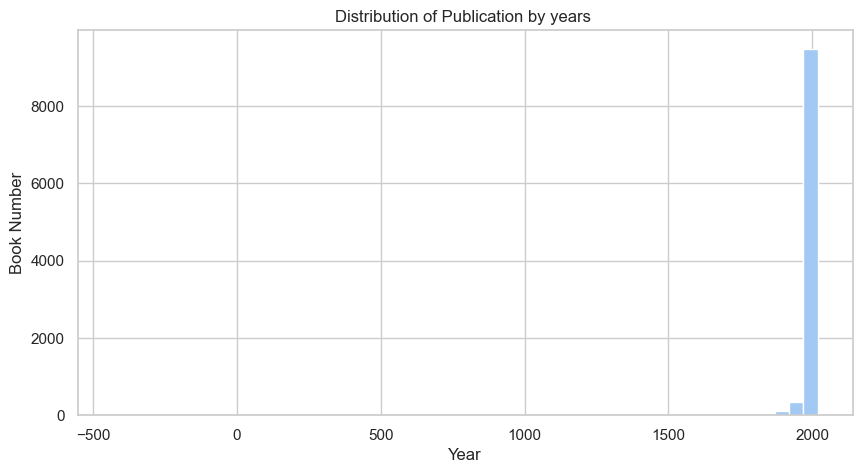

In [15]:
works_cleaned['original_publication_year'] = works_cleaned['original_publication_year'].astype(float)
works_cleaned['original_publication_year'].hist(bins=50)
plt.xlabel("Year")
plt.ylabel("Book Number")
plt.title("Distribution of Publication by years ")
plt.show()

In [16]:
#Books have the highest rating

In [17]:
works_cleaned.sort_values(by="avg_rating", ascending=False)[['original_title', 'author', 'avg_rating']].head(10)


,original_title,author,avg_rating
5148,"The Way of Kings, Part 2",Brandon Sanderson,4.8
7529,Words of Radiance,Brandon Sanderson,4.8
2756,Oathbringer,Brandon Sanderson,4.7
7533,Saga: Book One,Brian K. Vaughan,4.7
6389,The Wise Man's Fear,Patrick Rothfuss,4.6
8992,"Saga, Volume Two",Brian K. Vaughan,4.6
2642,The Name of the Wind,Patrick Rothfuss,4.6
5538,Empire of Storms,Sarah J. Maas,4.6
6731,Queen of Shadows,Sarah J. Maas,4.6
160,Bluestar's Prophecy,Erin Hunter,4.6


In [18]:
#Most-rated books

In [19]:
works_cleaned.sort_values(by="ratings_count", ascending=False)[['original_title', 'ratings_count']].head(10)

,original_title,ratings_count
4368,The Hunger Games,5066596
2627,Harry Potter and the Philosopher's Stone,4972886
2652,Twilight,3992661
2840,To Kill a Mockingbird,3402363
4111,The Great Gatsby,2852789
9296,The Fault in Our Stars,2564656
6350,Divergent,2277881
3326,Pride and Prejudice,2239951
3310,The Hobbit : or There and Back Again,2228361
3207,The Catcher in the Rye,2166748


In [20]:
#Distribution by number of pages

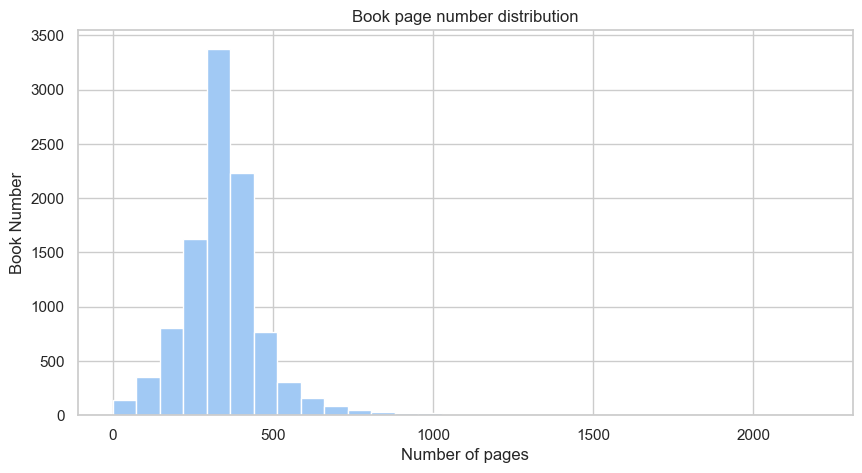

In [21]:
works_cleaned['num_pages'].hist(bins=30)
plt.xlabel("Number of pages")
plt.ylabel("Book Number")
plt.title("Book page number distribution")
plt.show()


In [22]:
#Review count per user

In [23]:
reviews_cleaned['user_id'].value_counts().head(10)


user_id
3693bb4f1062b659a354848cf11ca313    184
d8c39b3b11bb2da1c1d5c39f49669dea     91
f0f3401c2708dbe477054ff8e6d9de7b     80
b891f4c64ee8368a5408b9dda39e84d2     73
f070f1cc66d79485f12f9a185afb9413     63
8e7e5b546a63cb9add8431ee6914cf59     50
459cc457b6f63f7fdf9a79a29dcb398c     44
bedc8143657e38313d675a73385a04d8     42
4e90b6bba1c5933ec8d35387ee9db981     40
b28c31a1a07f1497a78f98a04494a10d     39
Name: count, dtype: int64

In [24]:
#Reviews count for books

In [25]:
reviews_cleaned['work_id'].value_counts().head(10)

work_id
3275794     36
8812783     35
3060926     33
3046572     32
41335427    32
2267189     30
919292      28
3212258     27
2422333     27
878368      27
Name: count, dtype: int64

In [26]:
#Average rating distribution

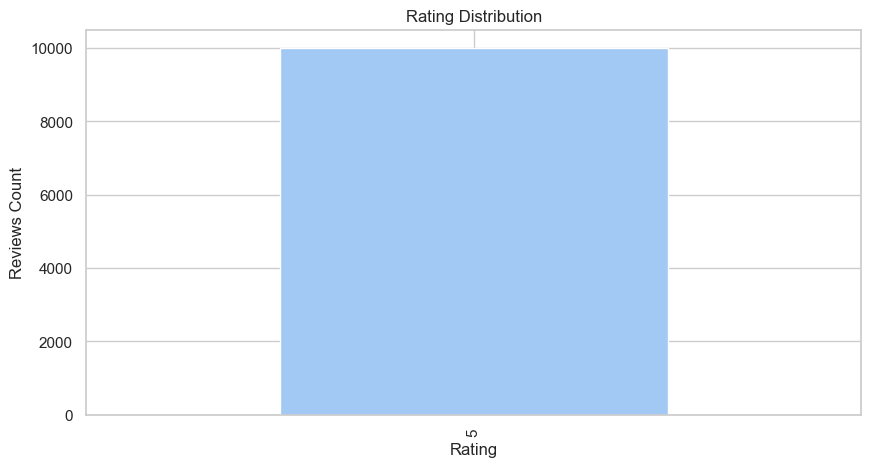

In [27]:
reviews_cleaned['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Reviews Count")
plt.title("Rating Distribution")
plt.show()


In [28]:
#Combining Books with Reviews

In [29]:
merged_df = reviews_cleaned.merge(works_cleaned, left_on='work_id', right_on='work_id')


In [30]:
#Hidden Gems

In [31]:

min_rating = 4.3
max_ratings_count = 1000


hidden_gems = works_cleaned[
    (works_cleaned['avg_rating'] >= min_rating) &
    (works_cleaned['ratings_count'] <= max_ratings_count)
].sort_values(by='avg_rating', ascending=False)


hidden_gems[['original_title', 'author', 'avg_rating', 'ratings_count']].head(10)


,original_title,author,avg_rating,ratings_count
2729,Magic Triumphs,Ilona Andrews,4.5,258
5668,Dirty Heart,Rhys Ford,4.5,881
7070,The Divide,E.J. Mellow,4.5,196
7520,To This Day: For the Bullied and Beautiful,Shane L. Koyczan,4.5,633
2623,Thin Lines,Bethany-Kris,4.4,612
4756,Quis Custodiet,Manna Francis,4.4,846
5580,Midnight Hour,C.C. Hunter,4.4,924
261,"Hellblazer, Volume 5: Dangerous Habits",Jamie Delano,4.3,869
1228,"The Language of Power (The Steerswoman, #4)",Rosemary Kirstein,4.3,828
1229,"The Outskirter's Secret (The Steerswoman, #2)",Rosemary Kirstein,4.3,873


In [32]:
#Recommendation Based on User's Favorite Genre

In [33]:

favorite_genre = "Fantasy"


genre_books = works_cleaned[
    works_cleaned['genres'].str.contains(favorite_genre, case=False, na=False)
]


min_rating = 4.3
max_ratings_count = 1000

personalized_recs = genre_books[
    (genre_books['avg_rating'] >= min_rating) &
    (genre_books['ratings_count'] <= max_ratings_count)
].sort_values(by='avg_rating', ascending=False)


personalized_recs[['original_title', 'author', 'avg_rating', 'ratings_count']].head(10)


,original_title,author,avg_rating,ratings_count
2729,Magic Triumphs,Ilona Andrews,4.5,258
7070,The Divide,E.J. Mellow,4.5,196
4756,Quis Custodiet,Manna Francis,4.4,846
5580,Midnight Hour,C.C. Hunter,4.4,924
261,"Hellblazer, Volume 5: Dangerous Habits",Jamie Delano,4.3,869
1228,"The Language of Power (The Steerswoman, #4)",Rosemary Kirstein,4.3,828
1229,"The Outskirter's Secret (The Steerswoman, #2)",Rosemary Kirstein,4.3,873
2577,Road Brothers,Mark Lawrence,4.3,888
2946,Retribution Rails,Erin Bowman,4.3,186
5659,A Tangle of Gold,Jaclyn Moriarty,4.3,775


In [34]:
print(reviews.head())

                          review_id                           user_id  \
0  fa7a00c01296e3b2b2e857d79c51ea77  3693bb4f1062b659a354848cf11ca313   
1  de0f7c8d15e247443e51969becf2878e  3693bb4f1062b659a354848cf11ca313   
2  e79b49504ef58b2defcdc8b79e2ec3fb  3693bb4f1062b659a354848cf11ca313   
3  495c1210a9dbd819cbf7717dfb8b217f  3693bb4f1062b659a354848cf11ca313   
4  54fcd8963c9dd56485d2a4ad152699c2  3693bb4f1062b659a354848cf11ca313   

   work_id  started_at  read_at               date_added  rating  \
0  6128277         NaN      NaN  2013-12-21 00:00:00.000       5   
1  3270810         NaN      NaN  2013-12-21 00:00:00.000       5   
2  4768235         NaN      NaN  2013-12-19 00:00:00.000       5   
3  6264661         NaN      NaN  2013-12-16 00:00:00.000       5   
4  3429537         NaN      NaN  2013-12-16 00:00:00.000       5   

                                         review_text  n_votes  n_comments  
0  Fire is half-human and half monster. Monsters ...        0           0  


In [35]:
#Works and Reviews combined

In [36]:
reviews = reviews[reviews['review_text'].notnull() & (reviews['review_text'].str.strip() != '')]


book_reviews = reviews.groupby("work_id")["review_text"].apply(lambda texts: " ".join(texts)).reset_index()

book_reviews.head()


,work_id,review_text
0,115,I don't want to even talk about this or I will...
1,423,classic space opera; important for taking into...
2,505,"I loved this fantasy/romance story, and laughe..."
3,696,My first Connie Willis and my favorite. You ha...
4,817,I love zombies and I loved this book. Some of ...


In [37]:
#TF-IDF + Cosine Similarity

In [74]:
#User reviews combined by books on review_text column, texts transformed into numerical vectors, similarity score calculated with cosine_similarity(books by books)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(book_reviews['review_text'])


cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


book_indices = pd.Series(book_reviews.index, index=book_reviews['work_id']).drop_duplicates()


In [39]:
def get_similar_books(work_id, top_n=5):
    idx = book_indices[work_id]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  
    similar_indices = [i[0] for i in sim_scores]
    return book_reviews.iloc[similar_indices]['work_id'].tolist()


In [40]:

get_similar_books(115)


[21734801, 2543234, 6803732, 3400, 2219294]

In [75]:
#Emotion points calculated by books with TextBlob library. Sentiment > 0.2 accepted as positive comments

In [41]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

book_reviews['sentiment'] = book_reviews['review_text'].apply(get_sentiment)


positive_reviews = book_reviews[book_reviews['sentiment'] > 0.2]  


In [76]:
#Most frequent words detected per book by analyzing positive comments with CountVectorizer(thought as theme)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_keywords(texts, top_n=5):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)
    word_freq = X.toarray().sum(axis=0)
    keywords = [(word, word_freq[idx]) for word, idx in vectorizer.vocabulary_.items()]
    keywords = sorted(keywords, key=lambda x: x[1], reverse=True)
    return [kw[0] for kw in keywords[:top_n]]

book_keywords = positive_reviews.groupby('work_id')['review_text'].apply(lambda x: get_top_keywords(x.tolist()))


In [43]:
book_keywords[115]


['book', 'read', 'great', 'loved', 'don']

In [77]:
#Automatic descriptions created by keywords

In [44]:
def create_explanation(keywords):
    templates = [
        f"This book is widely praised for its {keywords[0]} and {keywords[1]}.",
        f"Readers especially loved the {keywords[2]} narrative and {keywords[3]}.",
        f"If you're into books that are {keywords[4]}, this one might be for you!"
    ]
    return " ".join(templates)


In [45]:
def create_explanation(keywords):
    if len(keywords) < 5:
        keywords += [''] * (5 - len(keywords))  
    templates = [
        f"This book is widely praised for its {keywords[0]} and {keywords[1]}.",
        f"Readers especially loved the {keywords[2]} narrative and {keywords[3]}.",
        f"If you're into books that are {keywords[4]}, this one might be for you!"
    ]
    return " ".join(templates)


book_explanations = {}

for work_id, keywords in book_keywords.items():
    explanation = create_explanation(keywords)
    book_explanations[work_id] = explanation


In [78]:
#Personalized User Profile(Content based)

In [52]:

user_id = 'b891f4c64ee8368a5408b9dda39e84d2'

high_rated_books = reviews[(reviews['user_id'] == user_id) & (reviews['rating'] >= 4)]

liked_book_ids = high_rated_books['work_id'].tolist()


In [53]:

liked_keywords = []
for book_id in liked_book_ids:
    liked_keywords.extend(book_keywords.get(book_id, []))


In [54]:
from collections import Counter

keyword_counts = Counter(liked_keywords)


top_keywords = keyword_counts.most_common(10)
top_keywords


[('book', 31),
 ('series', 23),
 ('love', 17),
 ('just', 10),
 ('read', 8),
 ('like', 7),
 ('', 7),
 ('youtube', 6),
 ('favorite', 5),
 ('http', 5)]

In [79]:
#Created a word cloud by word frequency

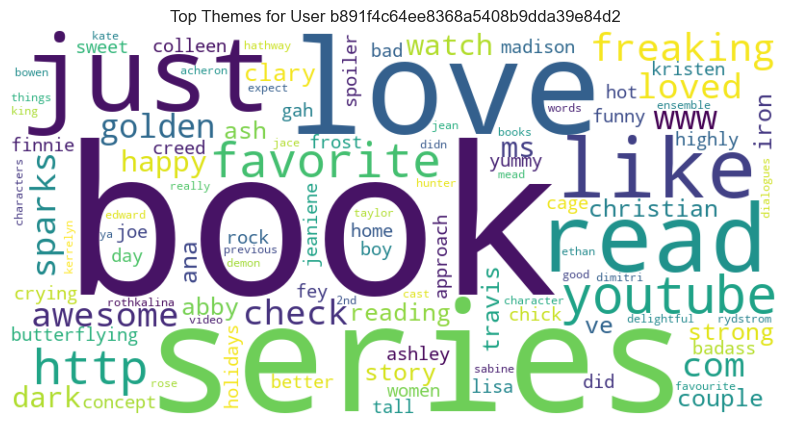

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Top Themes for User {user_id}")
plt.show()


In [69]:
#Featuring Themes

In [62]:

liked_genres = []

for work_id in liked_book_ids:
    
    genres = works_cleaned.loc[works_cleaned['work_id'] == work_id, 'genres']
    
    if not genres.empty:
        genre_list = genres.values[0]  
        
       
        if isinstance(genre_list, str):
            liked_genres.extend([g.strip() for g in genre_list.split(',')])
        elif isinstance(genre_list, list):
            liked_genres.extend(genre_list)



In [80]:
#Most-Liked Genres detected by genres field

In [63]:
from collections import Counter
genre_counts = Counter(liked_genres)
top_genres = genre_counts.most_common(10)
top_genres


[('fiction', 63),
 ('romance', 63),
 ('fantasy', 56),
 ('paranormal', 56),
 ('mystery', 30),
 ('thriller', 30),
 ('crime', 30),
 ('young-adult', 26),
 ('history', 5),
 ('historical fiction', 5)]

C:\Users\pelin\AppData\Local\Temp\ipykernel_24220\1471118686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Genre', data=df_genres, palette='viridis')


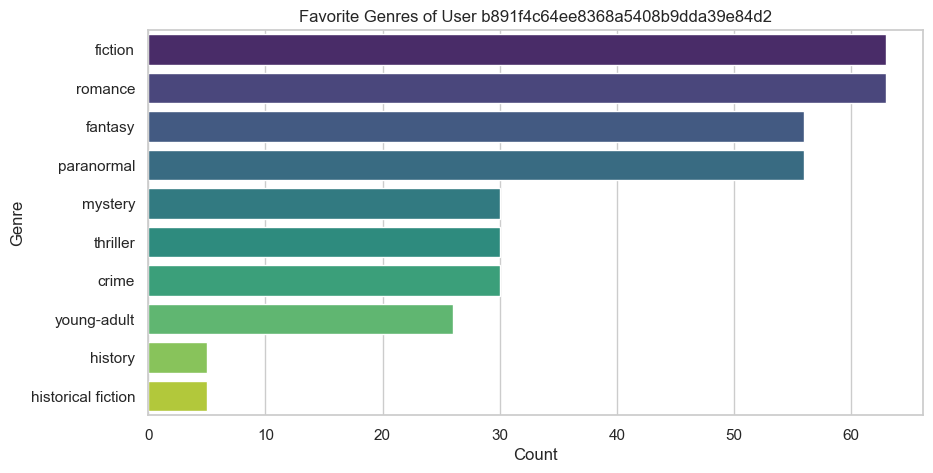

In [64]:
df_genres = pd.DataFrame(top_genres, columns=['Genre', 'Frequency'])


plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Genre', data=df_genres, palette='viridis')
plt.title(f"Favorite Genres of User {user_id}")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


In [81]:
#Content- Based Recommendation System

In [82]:
#User profile vector created by taking TF-IDF vector average of user's favorite books. This vector has compared with other books and recommended based on content.

In [83]:
#Already liked books excluded from the recommendation list

In [68]:

liked_book_indices = book_indices[book_indices.index.isin(liked_book_ids)].values


liked_vectors = tfidf_matrix[liked_book_indices]


user_profile_vector = liked_vectors.mean(axis=0).A 


cosine_similarities = cosine_similarity(user_profile_vector, tfidf_matrix)



similar_books_indices = cosine_similarities.argsort()[0][::-1]


already_liked_indices = set(liked_book_indices)

recommended_indices = [idx for idx in similar_books_indices if idx not in already_liked_indices][:10]


recommended_work_ids = book_reviews.iloc[recommended_indices]['work_id']


recommended_books = works_cleaned[works_cleaned['work_id'].isin(recommended_work_ids)]

recommended_books[['original_title', 'genres']]



,original_title,genres
931,Dark Reunion,"young-adult, fantasy, paranormal, romance, fic..."
1495,Glass Houses,"fantasy, paranormal, romance, fiction, young-a..."
2634,The Book Thief,"fiction, history, historical fiction, biograph..."
3874,Luck in the Shadows,"fiction, fantasy, paranormal, romance, mystery..."
3936,The Outsiders,"fiction, young-adult, history, historical fict..."
4373,The Summoning,"young-adult, fantasy, paranormal, romance, fic..."
4603,The Help,"fiction, history, historical fiction, biograph..."
9255,The Edge of Never,"romance, young-adult, fiction"
9523,Days of Blood & Starlight,"fantasy, paranormal, young-adult, romance, fic..."
9746,Ascend,"fantasy, paranormal, young-adult, romance, fic..."
